<a href="https://colab.research.google.com/github/s-kp/CapstoneProject-MLUnsupervised/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Data Preparation**

## **Importing and Inspecting Dataset**

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from prettytable import PrettyTable 

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Defining url of saved csv file
url = 'https://drive.google.com/uc?id=1_W3Jfp1bTWpPFmqyGgGXYJGd0rHIV8dD'

# Importing dataset to create a dataframe
df = pd.read_excel(url)

In [27]:
# Checking shape of dataframe
df.shape

(541909, 8)

In [28]:
# Checking top 5 records
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [29]:
# Checking bottom 5 records
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [30]:
# Checking all the columns present in the dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [31]:
# Basic Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [32]:
# Descriptive Statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [33]:
# Checking number of unique values in each column
for col in df.columns:
  print(col,':',df[col].nunique())

InvoiceNo : 25900
StockCode : 4070
Description : 4223
Quantity : 722
InvoiceDate : 23260
UnitPrice : 1630
CustomerID : 4372
Country : 38


##**Feature Engineering**

In [46]:
# Missing data counts and percentage
missing = df.columns[df.isnull().any()].tolist()

print('Missing Data Count')
print(df[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(df[missing].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


In [47]:
# Dropping the rows with nulls
df.dropna(inplace=True)

In [48]:
# Checking duplicates
print(len(df[df.duplicated()]))

5225


In [49]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [50]:
# New Shape
df.shape

(401604, 8)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [52]:
# Creating new features from the datetime column InvoiceDate
df["year"]      = df["InvoiceDate"].apply(lambda x: x.year)
df['Month']     = df['InvoiceDate'].apply(lambda x: x.month_name())
df['Day']       = df['InvoiceDate'].apply(lambda x: x.day_name())
df["hour"]      = df["InvoiceDate"].apply(lambda x: x.hour)

In [53]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
df['TotalAmount'] = df['Quantity']*df['UnitPrice']

In [54]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening
df['TimeType'] = np.where((df["hour"]>5)&(df["hour"]<18), np.where(
                           df["hour"]<12, 'Morning','Afternoon'),'Evening')

In [55]:
# Checking the number of cancellations by each customer. InvoiceNo starting with 'C' represents cancellation
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
cancellations = df[df['InvoiceNo'].str.contains('C')].groupby('CustomerID')[['InvoiceNo']].count()

# Renaming the columns and checking top 5 cancellations
cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
cancellations.sort_values(by=['Cancellations'], ascending=False).head()

,Cancellations
CustomerID,
14911.0,226
17841.0,136
17511.0,113
15311.0,112
12607.0,101


In [56]:
# Dropping cancellations from the main dataframe
df = df[~df['InvoiceNo'].str.contains('C')]

## **Exploratory Data Analysis**

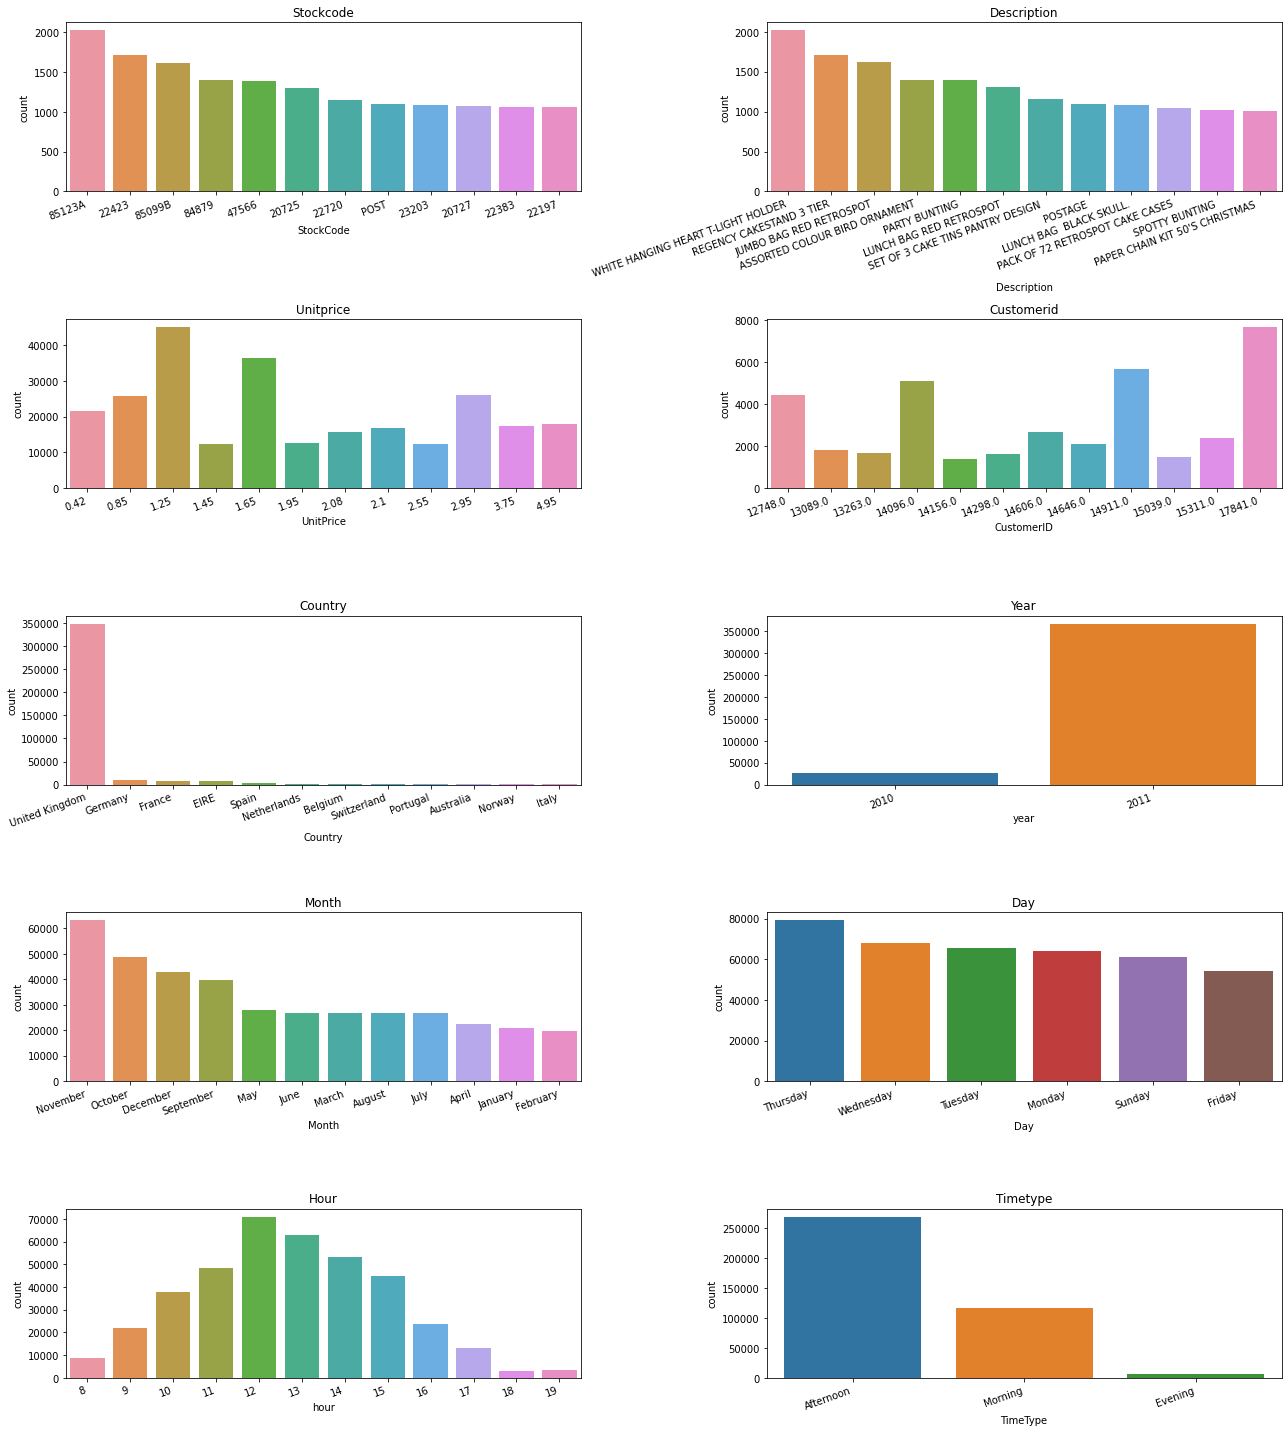

In [57]:
# Plotting top values based on frequency in each column
target = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'year', 'Month','Day','hour','TimeType']

plt.figure(figsize=(18,20))
for n,col in enumerate(target):
  plt.subplot(5, 2, n+1)
  temp = df[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

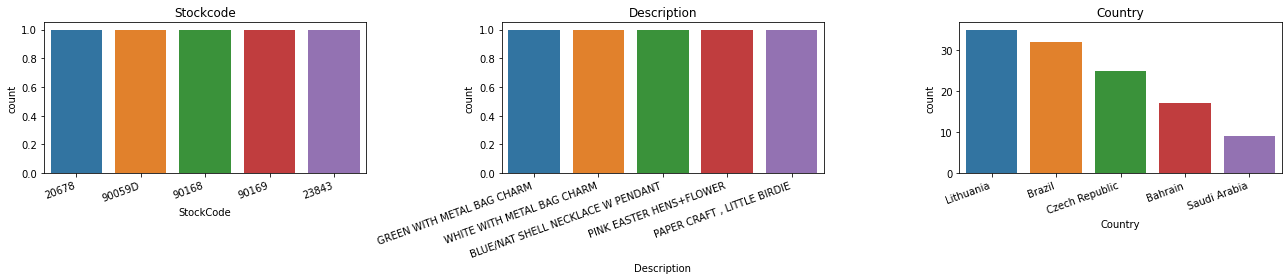

In [58]:
# Plotting Bottom values based on frequency in each column
target = ['StockCode', 'Description','Country']

plt.figure(figsize=(18,4))
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  temp = df[col].value_counts().reset_index().tail(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

Observations:
1. Most numbers of customers have purched the gifts in the month of November ,October and December September
less numbers of customers have purches the gifts in the month of April ,january and February.
2. Most of the customers have purched the items in Aftrnoon ,moderate numbers of customers have purched the items in Morning and least numbers of customers have purched the items in Evening.
3. 

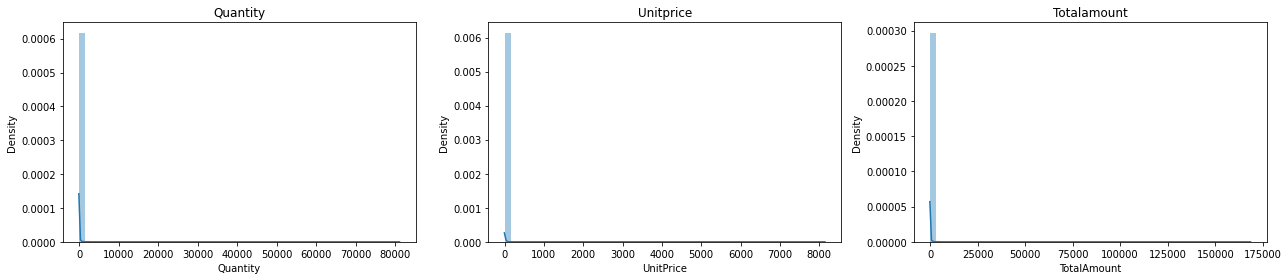

In [59]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(18,4))
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(df[col])
  plt.title(col.title())
  plt.tight_layout()


1. In Positively skewed distribution, mean>median>mode and most of the values are clustered around the left tail of the distribution while the right tail of the distribution is longer.
2. In Negatively skewed distribution, mean<median<mode and most of the values are concentrated in the right side of the distribution graph while the left tail of the distribution graph is longer.
3. For symmetric graph mean=median=mode

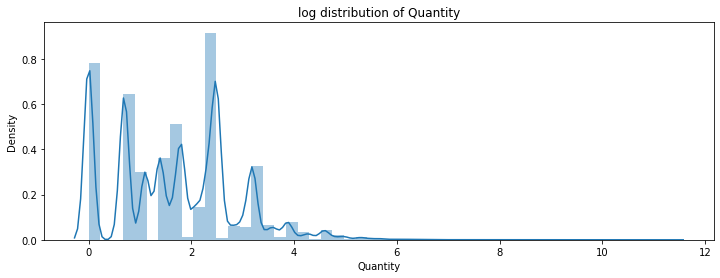

In [60]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(12,4))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))

## **RFM Segmentation**

In [61]:
# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = df["InvoiceDate"].max() + pd.DateOffset(days=1)

# Createing a new dataframe to calculate Recency, Frequency and Monetry scores for each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LatestDate - x.max()).days,
                                    'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Renaming the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Checking top 5 rows
rfm.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [62]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

# Finding the RFM Group Score for each customer by combining the factors R,Fand M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Splitting RFM again in 4 segments based on quantiles to obtain segment
rfm['Segment'] = pd.qcut(rfm['RFM'], q=4, labels=[1,2,3,4]).astype(int)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,Segment
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,1
12347.0,2,182,4310.00,4,4,4,444,4
12348.0,75,31,1797.24,2,2,4,224,2
12349.0,19,73,1757.55,3,3,4,334,3
12350.0,310,17,334.40,1,1,2,112,1


1. If the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is a Big spender.

2. If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is a little spender.

3. If the RFM of any customer is 144. His purchased a long time ago but buys frequently and spends more. And so on.

In [63]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,Segment,Recency_Log,Frequency_Log,Monetary_Log
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,1,5.786897,0.000000,11.253942
12347.0,2,182,4310.00,4,4,4,444,4,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,2,2,4,224,2,4.317488,3.433987,7.494007
12349.0,19,73,1757.55,3,3,4,334,3,2.944439,4.290459,7.471676
12350.0,310,17,334.40,1,1,2,112,1,5.736572,2.833213,5.812338


In [64]:
# Checking Descriptive Stats
rfm.describe()

,Recency,Frequency,Monetary,R,F,M,RFM,Segment,Recency_Log,Frequency_Log,Monetary_Log
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,92.518322,90.512100,2048.216154,2.514174,2.487670,2.499885,278.793962,2.428670,3.767274,3.670868,6.584187
std,100.009747,225.515328,8984.248299,1.126392,1.122724,1.118266,118.825268,1.146554,1.432382,1.321685,1.265573
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000
25%,18.000000,17.000000,306.455000,2.000000,1.000000,1.500000,211.000000,1.000000,2.890372,2.833213,5.725071
50%,51.000000,41.000000,668.560000,3.000000,2.000000,2.000000,311.000000,2.000000,3.931826,3.713572,6.505126
75%,142.000000,98.000000,1660.315000,4.000000,3.000000,3.500000,411.000000,3.000000,4.955827,4.584967,7.414763
max,374.000000,7676.000000,280206.020000,4.000000,4.000000,4.000000,444.000000,4.000000,5.924256,8.945854,12.543280


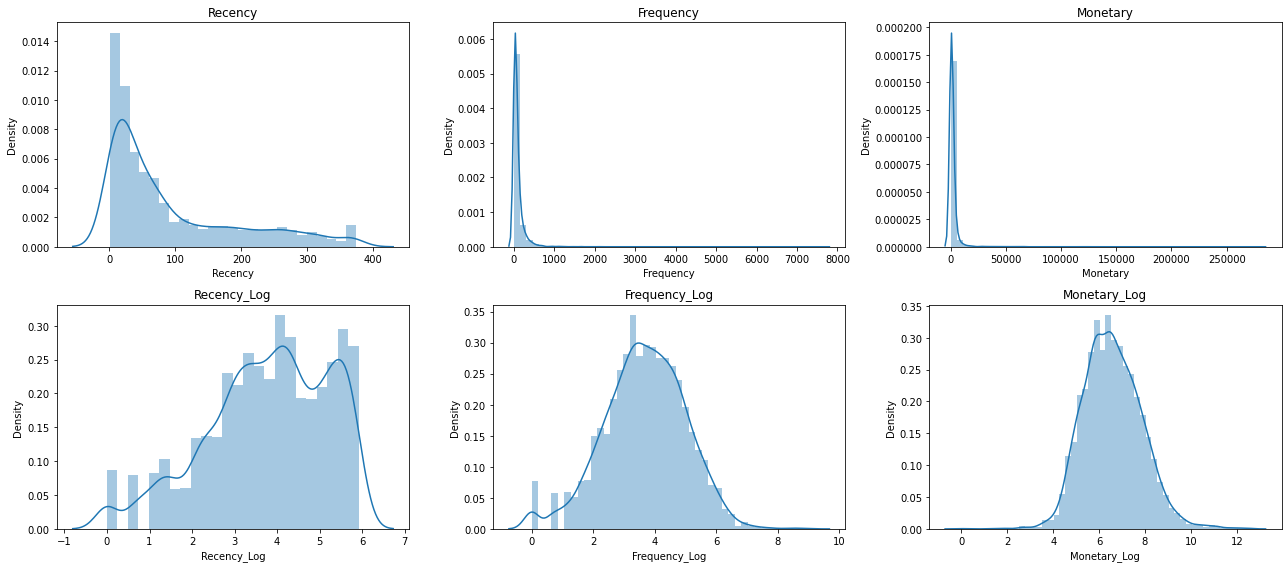

In [65]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(18,8))
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

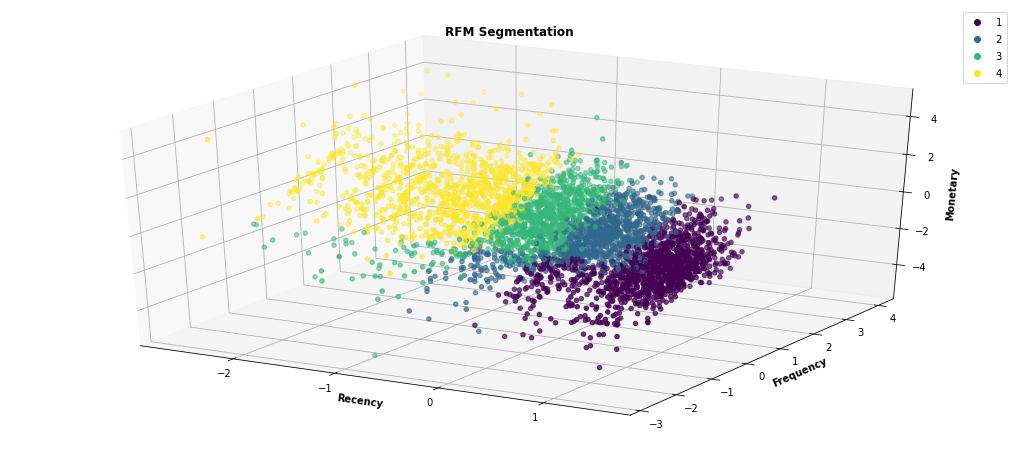

In [66]:
# Defining X Variables
X = rfm[['Recency_Log','Frequency_Log','Monetary_Log']]
X = StandardScaler().fit_transform(X)

# Plotting Segments for Visualization
plt.figure(figsize = (18, 8))
ax = plt.axes(projection ="3d")
ax.set_xlabel('Recency', fontweight ='bold')
ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_zlabel('Monetary', fontweight ='bold')
ax.set_title('RFM Segmentation', fontweight ='bold')
ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=rfm['Segment'])
plt.legend(*ax.legend_elements(), loc=1)
plt.show()